In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
BUCKET_SIZE = 60

session = "strassenbahn"

READ_PATH = f"D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session\\{session}"
WRITE_PATH = "D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session"

img_name = "0_25_alias_0993.png"
img = cv2.imread(f"{READ_PATH}\\{img_name}", cv2.IMREAD_COLOR)

size_y = img.shape[0]
size_x = img.shape[1]
steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)


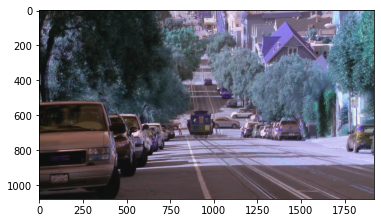

In [3]:
plt.imshow(img)

In [4]:
model = tf.keras.models.load_model(
    "D:\\Main\\MA_PROGR\\Code_CNN_singleRGB_Regression\\models\\single_rgb_image_regression_V02_epochs_100_1653595623")


In [5]:
alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()


In [6]:
def create_alias_values(img):
    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE] / 255
            # buckets[y][x]=bucket
            # print(bucket.shape)
            tmp_res = model.predict(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 3))
            alias_values[y][x] = 1 - float(tmp_res)
    return alias_values


single_RGB_Model_result = create_alias_values(img)


In [7]:

np.array(single_RGB_Model_result).shape


(18, 32)

In [8]:
np.save(f"{WRITE_PATH}\\{img_name}_cnn_matrix",
        single_RGB_Model_result)
